In [5]:
'''Three species model of a food chain'''
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

y0 = [0.75,0.15,8] #plants sheep wolves
t_span = [0,2000]

par = {"a1":5,"b1":5,"a2":0.1,"b2":2,"d1":0.4,"d2":0.1}

def FC(t,y,par):
    X,Y,Z = y
    dX = X * (1-X) - ((par['a1']*X)/(1+par['b1']*X))*Y
    dY = ((par['a1']*X)/(1+par['b1']*X)) * Y -par['d1']*Y - ((par['a2']*Y)/(1+par['b2']*Y))*Z
    dZ = ((par['a2']*Y)/(1+par['b2']*Y))*Z - par['d2']* Z

    return np.array([dX,dY,dZ])

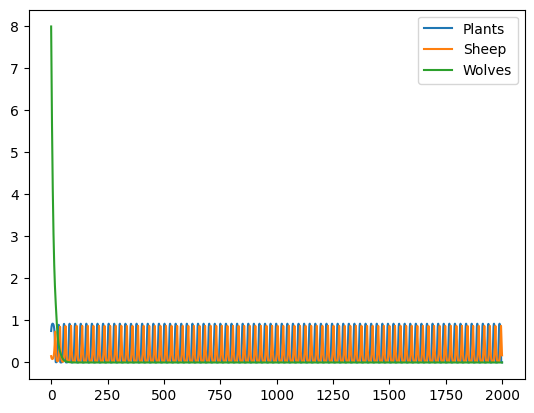

In [6]:
sol = solve_ivp(fun=lambda t,y: FC(t,y,par),t_span=t_span,y0=y0,t_eval=np.linspace(0,2000,20000))

labels = ['Plants','Sheep','Wolves']
for i in range(3):
    plt.plot(np.linspace(0,2000,20000),sol.y[i,:],label = labels[i])
plt.legend()

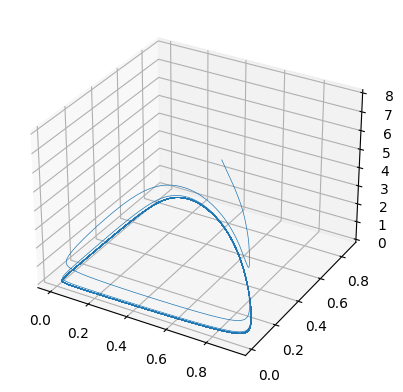

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(sol.y[0,:],sol.y[1,:],sol.y[2,:],linewidth=0.5)